In [ ]:
'''>>>>>  
Keras model for PV power system'''

#import useful packages
import keras
import pandas as pd
from keras.models import Sequential
import numpy as np
import keras.backend as kb
import tensorflow as tf
import statistics
import random
#the follwoing 2 lines are only needed for Mac OS machines
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

#create input data array
xdata = []

#Part 1 input data: Air temp (degC), ID (W/sqm), load resistance (ohms)
xdata = [[-10.0, 350, 4.464], 
  [-10.0, 650, 4.464], 
  [-10.0, 950, 4.464], 
  [-10.0, 1250, 4.464], 
  [10.0, 350, 4.464], 
  [10.0, 650, 4.464], 
  [10.0, 950, 4.464], 
  [10.0, 1250, 4.464], 
  [30.0, 350, 4.464], 
  [30.0, 650, 4.464], 
  [30.0, 950, 4.464], 
  [30.0, 1250, 4.464], 
  [-10.0, 350, 6.696], 
  [-10.0, 650, 6.696], 
  [-10.0, 950, 6.696], 
  [-10.0, 1250, 6.696], 
  [10.0, 350, 6.696], 
  [10.0, 650, 6.696], 
  [10.0, 950, 6.696], 
  [10.0, 1250, 6.696], 
  [30.0, 350, 6.696], 
  [30.0, 650, 6.696], 
  [30.0, 950, 6.696], 
  [30.0, 1250, 6.696], 
  [-10.0, 350, 8.928], 
  [-10.0, 650, 8.928], 
  [-10.0, 950, 8.928], 
  [-10.0, 1250, 8.928], 
  [10.0, 350, 8.928], 
  [10.0, 650, 8.928], 
  [10.0, 950, 8.928], 
  [10.0, 1250, 8.928], 
  [30.0, 350, 8.928], 
  [30.0, 650, 8.928], 
  [30.0, 950, 8.928], 
  [30.0, 1250, 8.928]]


#create input data array
ydata = []

#Part 1 output data: VL (V) and Power out Wd (W)
ydata = [[18.9, 80.3], 
 [23.5, 124.6], 
 [24.8, 138.6], 
 [25.6, 146.9], 
 [19.2, 83.1], 
 [25.0, 140.5], 
 [26.5, 157.6], 
 [27.3, 167.5],  
 [19.4, 84.7], 
 [26.4, 156.7], 
 [28.1, 177.7], 
 [29.0, 189.4],
 [22.4, 75.2], 
 [24.8, 92.2], 
 [25.8, 99.7], 
 [26.4, 104.6], 
 [23.6, 83.7], 
 [26.5, 104.9], 
 [27.6, 113.8], 
 [28.3, 119.6], 
 [24.8, 92.0], 
 [28.1, 118.2], 
 [29.3, 128.8], 
 [30.1, 135.5],  
 [23.5, 62.2], 
 [25.4, 72.5], 
 [26.3, 77.6], 
 [26.9, 81.1],  
 [25.0, 70.3], 
 [27.1, 82.7], 
 [28.1, 88.7], 
 [28.7, 92.8],  
 [26.5, 78.6], 
 [28.8, 93.5], 
 [29.9, 100.5], 
 [30.6, 105.2]]

#Normalizing
T=[]
ID=[]
R=[]
V=[]
W=[]

for i in (xdata):
    T.append(i[0])
    ID.append(i[1])
    R.append(i[2])
for j in (ydata):
    V.append(j[0])
    W.append(j[1])
    
Tamed = statistics.median(T)
IDmed = statistics.median(ID)
RLmed = statistics.median(R)

VLmed = statistics.median(V)
Wdmed = statistics.median(W)

xdata3=[]
ydata3=[]
Tn=0
In=0
Rn=0
Vn=0
Wn=0

for i in (xdata):
    Tn=i[0]/Tamed
    In=i[1]/IDmed
    Rn=i[2]/RLmed
    xdata3.append([Tn,In,Rn])

for j in (ydata):
    Vn=j[0]/VLmed
    Wn=j[1]/Wdmed
    ydata3.append([Vn,Wn])
#Separating data

z=int((2/3)*len(xdata3))
Randomization=[]
for k in range (z):
    Randomization.append(0)
for k in range (len(xdata3)-z):
    Randomization.append(1)
random.shuffle(Randomization)



xtrain=[]
xtest=[]
ytrain=[]
ytest=[]

for i in range (len(Randomization)):
    if Randomization[i]==0:
        xtrain.append(xdata3[i])
        ytrain.append(ydata3[i])
    else:
        xtest.append(xdata3[i])
        ytest.append(ydata3[i])
        

xarray= np.array(xtrain)
xarray2=np.array(xtest)
print("training data set is:",xarray)
print("test data set is:",xarray2)

    
yarray= np.array(ytrain)
yarray2=np.array(ytest)
print(yarray)
print(yarray2)

training data set is: [[-1.          0.4375      0.66666667]
 [-1.          1.1875      0.66666667]
 [ 1.          0.8125      0.66666667]
 [ 1.          1.1875      0.66666667]
 [ 1.          1.5625      0.66666667]
 [ 3.          0.8125      0.66666667]
 [ 3.          1.1875      0.66666667]
 [ 3.          1.5625      0.66666667]
 [-1.          0.8125      1.        ]
 [-1.          1.5625      1.        ]
 [ 1.          0.4375      1.        ]
 [ 1.          0.8125      1.        ]
 [ 1.          1.1875      1.        ]
 [ 1.          1.5625      1.        ]
 [ 3.          0.8125      1.        ]
 [ 3.          1.1875      1.        ]
 [-1.          0.4375      1.33333333]
 [-1.          0.8125      1.33333333]
 [-1.          1.1875      1.33333333]
 [-1.          1.5625      1.33333333]
 [ 1.          0.8125      1.33333333]
 [ 3.          0.4375      1.33333333]
 [ 3.          0.8125      1.33333333]
 [ 3.          1.1875      1.33333333]]
test data set is: [[-1.          0.8125  

In [ ]:
# define neural network model

#As seen below, we have created four dense layers. 
#A dense layer is a layer in neural network that’s fully connected. 
#In other words, all the neurons in one layer are connected to all other neurons in the next layer.
#In the first layer, we need to provide the input shape, which is 1 in our case. 
#The activation function we have chosen is elu, which stands for exponential linear unit. .

from keras import backend as K
#initialize weights with values between -0.2 and 0.5
initializer = keras.initializers.RandomUniform(minval= -0.2, maxval=0.5)

model = keras.Sequential([
    keras.layers.Dense(6, activation=K.elu, input_shape=[3],  kernel_initializer=initializer),
    keras.layers.Dense(8, activation=K.elu,  kernel_initializer=initializer),
    keras.layers.Dense(16, activation=K.elu, kernel_initializer=initializer),
    keras.layers.Dense(8, activation=K.elu, kernel_initializer=initializer),
    keras.layers.Dense(2,  kernel_initializer=initializer)
  ])


In [ ]:
#We’re using RMSprop as our optimizer here. RMSprop stands for Root Mean Square Propagation. 
#It’s one of the most popular gradient descent optimization algorithms for deep learning networks. 
#RMSprop is an optimizer that’s reliable and fast.
#We’re compiling the mode using the model.compile function. The loss function used here 
#is mean squared error. After the compilation of the model, we’ll use the fit method with ~500 epochs.
#Number of epochs can be varied.

#from tf.keras import optimizers
rms = keras.optimizers.RMSprop(0.020)
model.compile(loss='mean_absolute_error',optimizer=rms)


In [ ]:
#After the compilation of the model, we’ll use the fit method with 500 epochs.
#I started with epochs value of 100 and then tested the model after training. 
#The prediction was not that good. Then I modified the number of epochs to 200 and tested the model again. 
#Accuracy had improved slightly, but figured I’d give it one more try. Finally, at 500 epochs 
#I found acceptable prediction accuracy.

#The fit method takes three parameters; namely, x, y, and number of epochs. 
#During model training, if all the batches of data are seen by the model once, 
#we say that one epoch has been completed.

# Add an early stopping callback
es = keras.callbacks.EarlyStopping(
    monitor='loss', 
    mode='min', 
    patience = 80, 
    restore_best_weights = True, 
    verbose=1)
# Add a checkpoint where loss is minimum, and save that model
mc = keras.callbacks.ModelCheckpoint('best_model.SB', monitor='loss', 
                     mode='min',  verbose=1, save_best_only=True)

historyData = model.fit(xarray,yarray,epochs=500,callbacks=[es])

loss_hist = historyData.history['loss']
#The above line will return a dictionary, access it's info like this:
best_epoch = np.argmin(historyData.history['loss']) + 1
print ('best epoch = ', best_epoch)
print('smallest loss =', np.min(loss_hist))

model.save('./best_model')

Epoch 1/500
1/1 [==============================] - 3s 3s/step - loss: 0.4920
Epoch 2/500
1/1 [==============================] - 0s 11ms/step - loss: 1.0472
Epoch 3/500
1/1 [==============================] - 0s 11ms/step - loss: 0.7741
Epoch 4/500
1/1 [==============================] - 0s 23ms/step - loss: 0.2322
Epoch 5/500
1/1 [==============================] - 0s 40ms/step - loss: 0.4887
Epoch 6/500
1/1 [==============================] - 0s 28ms/step - loss: 0.7045
Epoch 7/500
1/1 [==============================] - 0s 32ms/step - loss: 0.4331
Epoch 8/500
1/1 [==============================] - 0s 37ms/step - loss: 0.1907
Epoch 9/500
1/1 [==============================] - 0s 56ms/step - loss: 0.4345
Epoch 10/500
1/1 [==============================] - 0s 11ms/step - loss: 0.1623
Epoch 11/500
1/1 [==============================] - 0s 11ms/step - loss: 0.1679
Epoch 12/500
1/1 [==============================] - 0s 28ms/step - loss: 0.2982
Epoch 13/500
1/1 [==============================] -

In [ ]:


# This line of code can be used to reconstruct the saved model.

recon_model = keras.models.load_model("best_model")

# the name of the model is now "recon_model". You can then use this model to do predictions for comparisons.
# See the previous project for code to do the comparisons.

predicted=recon_model.predict(xtrain)
print(predicted)






1/1 [==============================] - 0s 218ms/step
[[0.8944435  1.042447  ]
 [0.9682182  1.335061  ]
 [1.0214844  1.335115  ]
 [1.0571451  1.4910674 ]
 [1.0783024  1.6305413 ]
 [1.0897335  1.4713917 ]
 [1.1013987  1.6031609 ]
 [1.108976   1.7269351 ]
 [0.9588403  0.9215636 ]
 [1.0470631  1.134054  ]
 [0.99412596 0.9286408 ]
 [1.0451915  1.0210667 ]
 [1.0890108  1.1416142 ]
 [1.110634   1.269295  ]
 [1.1162691  1.1542541 ]
 [1.1307437  1.2601159 ]
 [0.94060755 0.77927166]
 [0.9756671  0.81646216]
 [1.0172762  0.8641465 ]
 [1.0621625  0.9261683 ]
 [1.04591    0.87941575]
 [1.0818484  0.91055363]
 [1.1178905  0.9776572 ]
 [1.1382098  1.0461257 ]]


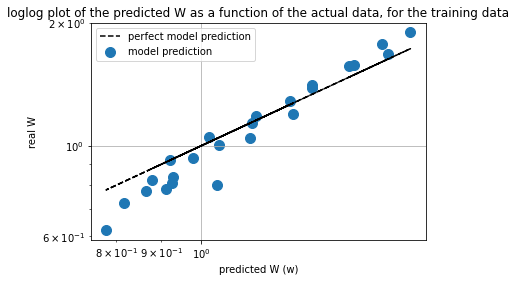

In [ ]:
import matplotlib.pyplot as plt
x=predicted[:,1]
y=yarray[:,1]
plt.plot(x,x,label='perfect model prediction', color='black',linestyle='--')
plt.scatter(x,y,s=100,label='model prediction')
plt.loglog()
plt.xlabel('predicted W (w)')
plt.ylabel('real W')
plt.title('loglog plot of the predicted W as a function of the actual data, for the training data')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [ ]:
import math as ma
from sklearn.metrics import mean_squared_error

RMSE=ma.sqrt(mean_squared_error(predicted[:,1], yarray[:,1]))
print(RMSE)


0.10012089161663587


In [ ]:
predicted_test=recon_model.predict(xtest)
print (predicted_test)

1/1 [==============================] - 0s 47ms/step
[[0.9267329  1.176141  ]
 [1.0139112  1.5019948 ]
 [0.97555006 1.1694789 ]
 [1.0698913  1.3300108 ]
 [0.9240377  0.85850394]
 [1.0010879  1.008393  ]
 [1.0881114  1.0515131 ]
 [1.1365197  1.3762231 ]
 [0.99823785 0.82648945]
 [1.0924232  0.9473273 ]
 [1.121434   1.0223593 ]
 [1.1500384  1.1201534 ]]


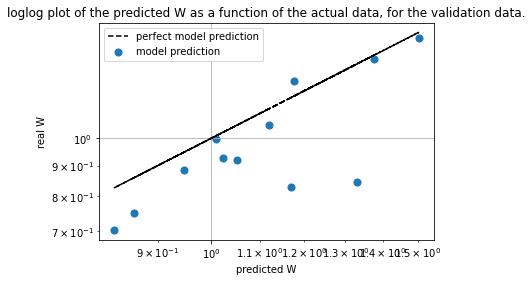

In [ ]:
import matplotlib.pyplot as plt
x=predicted_test[:,1]
y=yarray2[:,1]
plt.plot(x,x,label='perfect model prediction', color='black',linestyle='--')
plt.scatter(x,y,s=50,label='model prediction')
plt.loglog()
plt.xlabel('predicted W')
plt.ylabel('real W')
plt.title('loglog plot of the predicted W as a function of the actual data, for the validation data.')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [ ]:
import math as ma
from sklearn.metrics import mean_squared_error

RMSE=ma.sqrt(mean_squared_error(predicted_test[:,1], yarray2[:,1]))
print(RMSE)

0.18661196007086375


In [ ]:
#Task 1.2.G: working with high flux data
import math, numpy
#Task 1.2.G

#Part 1 input HI FLUX DATA: Air temp (degC), ID (W/sqm), load resistance (ohms)

xdata1 = [[-10.0, 1550, 4.464], 
  [-10.0, 1850, 4.464], 
  [10.0, 1550, 4.464], 
  [10.0, 1850, 4.464], 
  [30.0, 1550, 4.464], 
  [30.0, 1850, 4.464], 
  [-10.0, 1550, 6.696], 
  [-10.0, 1850, 6.696], 
  [10.0, 1550, 6.696], 
  [10.0, 1850, 6.696], 
  [30.0, 1550, 6.696], 
  [30.0, 1850, 6.696], 
  [-10.0, 1550, 8.928], 
  [-10.0, 1850, 8.928],   
  [10.0, 1550, 8.928], 
  [10.0, 1850, 8.928], 
  [30.0, 1550, 8.928], 
  [30.0, 1850, 8.928]]
 
#Part 1 output HI FLUX DATA: load voltage (V) and Power out (W)
ydata1 = [[26.1, 152.8], 
 [26.5, 172.7], 
 [27.9, 191.4], 
 [28.3, 198.0], 
 [29.6, 217.8], 
 [30.1, 224.4],  
 [26.9, 118.8], 
 [27.2, 122.1], 
 [28.8, 136.4], 
 [29.1, 139.7], 
 [30.6, 154.0], 
 [31.0, 158.4],  
 [27.3, 92.4], 
 [27.6, 94.6], 
 [29.2, 105.6], 
 [29.6, 107.8], 
 [31.1, 119.9], 
 [31.5, 123.2]]


Ta=[]
ID=[]
R=[]
V=[]
W=[]

for i in range (len(xdata1)):
    if xdata1[i][1]>1300:
        Ta.append(xdata1[i][0])
        ID.append(xdata1[i][1])
        R.append(xdata1[i][2])
        V.append(ydata1[i][0])
        W.append(ydata1[i][1])
    
Tamed2 = statistics.median(Ta)
IDmed2 = statistics.median(ID)
RLmed2 = statistics.median(R)

VLmed2 = statistics.median(V)
Wdmed2 = statistics.median(W)

xdata4=[]
ydata4=[]
VLn=0
Wdn=0
c=0
Tai=0
IDn=0
RLn=0

for i in range (len(xdata1)):
    if xdata1[i][1]>1300: #Normalizing the limited data for ID > 1300 W/m2
        Tai=xdata1[i][0]/Tamed
        IDn=xdata1[i][1]/IDmed
        RLn=xdata[i][2]/RLmed
        xdata4.append([Tai,IDn,RLn])
        VLn=ydata1[i][0]/VLmed
        Wdn=ydata1[i][1]/Wdmed
        ydata4.append([VLn,Wdn])


    

xarray4= numpy.array(xdata4)
yarray4= numpy.array(ydata4)
print (xdata4)
print (xarray4)
print (ydata4)
print (yarray4)

[[-1.0, 1.9375, 0.6666666666666667], [-1.0, 2.3125, 0.6666666666666667], [1.0, 1.9375, 0.6666666666666667], [1.0, 2.3125, 0.6666666666666667], [3.0, 1.9375, 0.6666666666666667], [3.0, 2.3125, 0.6666666666666667], [-1.0, 1.9375, 0.6666666666666667], [-1.0, 2.3125, 0.6666666666666667], [1.0, 1.9375, 0.6666666666666667], [1.0, 2.3125, 0.6666666666666667], [3.0, 1.9375, 0.6666666666666667], [3.0, 2.3125, 0.6666666666666667], [-1.0, 1.9375, 1.0], [-1.0, 2.3125, 1.0], [1.0, 1.9375, 1.0], [1.0, 2.3125, 1.0], [3.0, 1.9375, 1.0], [3.0, 2.3125, 1.0]]
[[-1.          1.9375      0.66666667]
 [-1.          2.3125      0.66666667]
 [ 1.          1.9375      0.66666667]
 [ 1.          2.3125      0.66666667]
 [ 3.          1.9375      0.66666667]
 [ 3.          2.3125      0.66666667]
 [-1.          1.9375      0.66666667]
 [-1.          2.3125      0.66666667]
 [ 1.          1.9375      0.66666667]
 [ 1.          2.3125      0.66666667]
 [ 3.          1.9375      0.66666667]
 [ 3.          2.3125   

In [ ]:
predicted_g=recon_model.predict(xdata4)
print (predicted_g)

1/1 [==============================] - 0s 31ms/step
[[1.0476385 1.6518574]
 [1.0697626 1.787528 ]
 [1.0917997 1.7592576]
 [1.1013445 1.8808875]
 [1.1145439 1.8453288]
 [1.1192038 1.9601107]
 [1.0476385 1.6518574]
 [1.0697626 1.787528 ]
 [1.0917997 1.7592576]
 [1.1013445 1.8808875]
 [1.1145439 1.8453288]
 [1.1192038 1.9601107]
 [1.0801818 1.2845545]
 [1.0973814 1.4245771]
 [1.1199265 1.4004871]
 [1.1241505 1.5242617]
 [1.137589  1.4955702]
 [1.1373996 1.6109123]]


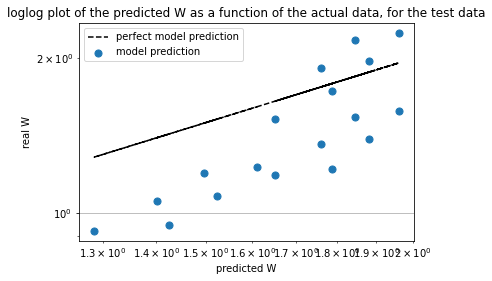

In [ ]:
import matplotlib.pyplot as plt
x=predicted_g[:,1]
y=yarray4[:,1]
plt.plot(x,x,label='perfect model prediction', color='black',linestyle='--')
plt.scatter(x,y,s=50,label='model prediction')
plt.loglog()
plt.xlabel('predicted W')
plt.ylabel('real W')
plt.title('loglog plot of the predicted W as a function of the actual data, for the test data')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [ ]:
RMSE=ma.sqrt(mean_squared_error(predicted_g[:,1], yarray4[:,1]))
print(RMSE)

0.3592016701594686


In [ ]:
#Here, taking the air temperature to be fixed at 20 °C, we want to create predictions of the solar power output for 4 Ohms < RL < 8 Ohms and 500 < ID < 1800 W/m2.
T=20
Rl=np.linspace(4,8,len(xdata))
Id=np.linspace(500,1800,len(xdata))


T1=[]
ID=[]
RL=[]
xdata5=[]

for i in range (len(Rl)):
    T1.append(T/Tamed)
    ID.append(Id[i]/IDmed)
    RL.append(Rl[i]/RLmed)
    xdata5.append([T1[i],ID[i],RL[i]])
#Let's print our data input to make sure we are working with the right data.    
print (np.array(xdata5))   

[[2.         0.625      0.59737157]
 [2.         0.67142857 0.61443932]
 [2.         0.71785714 0.63150708]
 [2.         0.76428571 0.64857484]
 [2.         0.81071429 0.6656426 ]
 [2.         0.85714286 0.68271036]
 [2.         0.90357143 0.69977812]
 [2.         0.95       0.71684588]
 [2.         0.99642857 0.73391364]
 [2.         1.04285714 0.7509814 ]
 [2.         1.08928571 0.76804916]
 [2.         1.13571429 0.78511691]
 [2.         1.18214286 0.80218467]
 [2.         1.22857143 0.81925243]
 [2.         1.275      0.83632019]
 [2.         1.32142857 0.85338795]
 [2.         1.36785714 0.87045571]
 [2.         1.41428571 0.88752347]
 [2.         1.46071429 0.90459123]
 [2.         1.50714286 0.92165899]
 [2.         1.55357143 0.93872675]
 [2.         1.6        0.9557945 ]
 [2.         1.64642857 0.97286226]
 [2.         1.69285714 0.98993002]
 [2.         1.73928571 1.00699778]
 [2.         1.78571429 1.02406554]
 [2.         1.83214286 1.0411333 ]
 [2.         1.87857143 1.05

In [ ]:
predicted_h= np.zeros((len(RL),len(RL)))

for k in range (len(xdata5)):
    for j in range (len(xdata5)):
        test = [[ 2.0 , ID[k], RL[j] ]]
        testarray = np.array(test)
        outpt = model.predict(testarray)
        predicted_h[k][j]=outpt[0][0]*Wdmed

1/1 [==============================] - 0s 27ms/step


KeyboardInterrupt: ignored

In [ ]:
ID2=[]
RL2=[]

for i in range (len(ID)):
    ID2.append(ID[i]*IDmed)
    RL2.append(RL[i]*RLmed)

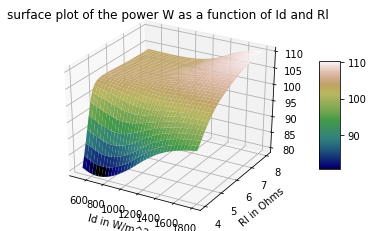

In [ ]:
from mpl_toolkits import mplot3d
import numpy 
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate


X=np.array(ID2)
Y=np.array(RL2)
X,Y=numpy.meshgrid(X,Y)
Z=np.array(predicted_h)

mycmap = plt.get_cmap('gist_earth')

fig = plt.figure()
ax = plt.axes(projection ='3d')
surf = ax.plot_surface(X,Y,Z,cmap=mycmap)


fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('surface plot of the power W as a function of Id and Rl')
plt.xlabel('Id in W/m^2')
plt.ylabel('Rl in Ohms')
plt.show()

In [ ]:
'''>>>>> start CodeP3.1.2F22
    V.P. Carey ME249, Fall 2022

Intro to Neural Network Modeling 
Keras model for PV power system'''

#import useful packages
import keras
import pandas as pd
from keras.models import Sequential
import numpy as np
import keras.backend as kb
import tensorflow as tf
import random
import statistics
#the follwoing 2 lines are only needed for Mac OS machines
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'



#create input data array
xdata = []

#Part 1 input data: Air temp (degC), ID (W/sqm), load resistance (ohms)
xdata = [[-10.0, 350, 4.464], 
  [-10.0, 650, 4.464], 
  [-10.0, 950, 4.464], 
  [-10.0, 1250, 4.464], 
  [10.0, 350, 4.464], 
  [10.0, 650, 4.464], 
  [10.0, 950, 4.464], 
  [10.0, 1250, 4.464], 
  [30.0, 350, 4.464], 
  [30.0, 650, 4.464], 
  [30.0, 950, 4.464], 
  [30.0, 1250, 4.464], 
  [-10.0, 350, 6.696], 
  [-10.0, 650, 6.696], 
  [-10.0, 950, 6.696], 
  [-10.0, 1250, 6.696], 
  [10.0, 350, 6.696], 
  [10.0, 650, 6.696], 
  [10.0, 950, 6.696], 
  [10.0, 1250, 6.696], 
  [30.0, 350, 6.696], 
  [30.0, 650, 6.696], 
  [30.0, 950, 6.696], 
  [30.0, 1250, 6.696], 
  [-10.0, 350, 8.928], 
  [-10.0, 650, 8.928], 
  [-10.0, 950, 8.928], 
  [-10.0, 1250, 8.928], 
  [10.0, 350, 8.928], 
  [10.0, 650, 8.928], 
  [10.0, 950, 8.928], 
  [10.0, 1250, 8.928], 
  [30.0, 350, 8.928], 
  [30.0, 650, 8.928], 
  [30.0, 950, 8.928], 
  [30.0, 1250, 8.928]]

''' ADD THE REST OF THE INPUT DATA AND CONVERT TO:
xdata = [[-10.0/Tamed, 350/IDmed, 4.464/RLmed]] 
xdata.append([-10.0/Tamed, 650/IDmed, 4.464/RLmed]) 
xdata.append([-10.0/Tamed, 950/IDmed, 4.464/RLmed]) 
xdata.append([-10.0/Tamed, 1250/IDmed, 4.464/RLmed]) 
... etc.'''


# define meadian values of input variables - add your values here


#create input data array
ydata = []

#Part 1 output data: VL (V) and Power out Wd (W)
ydata = [[18.9, 80.3], 
 [23.5, 124.6], 
 [24.8, 138.6], 
 [25.6, 146.9], 
 [19.2, 83.1], 
 [25.0, 140.5], 
 [26.5, 157.6], 
 [27.3, 167.5],  
 [19.4, 84.7], 
 [26.4, 156.7], 
 [28.1, 177.7], 
 [29.0, 189.4],
 [22.4, 75.2], 
 [24.8, 92.2], 
 [25.8, 99.7], 
 [26.4, 104.6], 
 [23.6, 83.7], 
 [26.5, 104.9], 
 [27.6, 113.8], 
 [28.3, 119.6], 
 [24.8, 92.0], 
 [28.1, 118.2], 
 [29.3, 128.8], 
 [30.1, 135.5],  
 [23.5, 62.2], 
 [25.4, 72.5], 
 [26.3, 77.6], 
 [26.9, 81.1],  
 [25.0, 70.3], 
 [27.1, 82.7], 
 [28.1, 88.7], 
 [28.7, 92.8],  
 [26.5, 78.6], 
 [28.8, 93.5], 
 [29.9, 100.5], 
 [30.6, 105.2]]

''' ADD THE REST OF THE OUPUT DATA AND CONVERT TO:
ydata = [[18.9/VLmed, 80.3/Wdmed]] 
ydata.append([23.5/VLmed, 124.6/Wdmed]) 
ydata.append([24.8/VLmed, 138.6/Wdmed]) 
ydata.append([25.6/VLmed, 146.9/Wdmed]) 
... etc.'''

Tai=[]
ID=[]
R=[]
V=[]
W=[]

for i in (xdata):
    Tai.append(i[0])
    ID.append(i[1])
    R.append(i[2])
for j in (ydata):
    V.append(j[0])
    W.append(j[1])
    
Tamed = statistics.median(Tai)
IDmed = statistics.median(ID)
RLmed = statistics.median(R)

VLmed = statistics.median(V)
Wdmed = statistics.median(W)

xdata3=[]
ydata3=[]
VLN=0
WDN=0
Tan=0
Idn=0
RLn=0

for i in (xdata):
    
    Tan=i[0]/Tamed
    Idn=i[1]/IDmed
    RLn=i[2]/RLmed
    xdata3.append([Tan,Idn,RLn])
    
VLN=0
WDN=0


for j in (ydata):
    VLN=j[0]/VLmed
    WDN=j[1]/Wdmed
    ydata3.append([VLN,WDN])
    
z=int((2/3)*len(xdata3))
Randomization=[]
for k in range (z):
    Randomization.append(0)
for k in range (len(xdata3)-z):
    Randomization.append(1)

random.shuffle(Randomization)



xtrain=[]
xtest=[]
ytrain=[]
ytest=[]

for i in range (len(Randomization)):
    if Randomization[i]==0:
        xtrain.append(xdata3[i])
        ytrain.append(ydata3[i])
    else:
        xtest.append(xdata3[i])
        ytest.append(ydata3[i])
        

xarray= np.array(xtrain)
xarray2=np.array(xtest)
print (xtrain)
print (xarray)

    
yarray= np.array(ytrain)
yarray2=np.array(ytest)
print (ytrain)
print (yarray)

24
[[-1.0, 0.4375, 0.6666666666666667], [-1.0, 0.8125, 0.6666666666666667], [-1.0, 1.1875, 0.6666666666666667], [-1.0, 1.5625, 0.6666666666666667], [1.0, 0.4375, 0.6666666666666667], [3.0, 0.4375, 0.6666666666666667], [3.0, 1.1875, 0.6666666666666667], [3.0, 1.5625, 0.6666666666666667], [-1.0, 0.4375, 1.0], [-1.0, 0.8125, 1.0], [-1.0, 1.1875, 1.0], [1.0, 0.4375, 1.0], [1.0, 0.8125, 1.0], [1.0, 1.5625, 1.0], [3.0, 0.4375, 1.0], [3.0, 0.8125, 1.0], [3.0, 1.5625, 1.0], [-1.0, 0.4375, 1.3333333333333335], [-1.0, 0.8125, 1.3333333333333335], [-1.0, 1.1875, 1.3333333333333335], [1.0, 0.4375, 1.3333333333333335], [1.0, 0.8125, 1.3333333333333335], [1.0, 1.5625, 1.3333333333333335], [3.0, 1.5625, 1.3333333333333335]]
[[-1.          0.4375      0.66666667]
 [-1.          0.8125      0.66666667]
 [-1.          1.1875      0.66666667]
 [-1.          1.5625      0.66666667]
 [ 1.          0.4375      0.66666667]
 [ 3.          0.4375      0.66666667]
 [ 3.          1.1875      0.66666667]
 [ 3.   

In [ ]:
# define neural network model

#As seen below, we have created four dense layers. 
#A dense layer is a layer in neural network that’s fully connected. 
#In other words, all the neurons in one layer are connected to all other neurons in the next layer.
#In the first layer, we need to provide the input shape, which is 1 in our case. 
#The activation function we have chosen is elu, which stands for exponential linear unit. .

from keras import backend as K
#initialize weights with values between -0.2 and 0.5
initializer = keras.initializers.RandomUniform(minval= -0.2, maxval=0.5)

model = keras.Sequential([
    keras.layers.Dense(6, activation=K.elu, input_shape=[3],  kernel_initializer=initializer),
    keras.layers.Dense(8, activation=K.elu,  kernel_initializer=initializer),
    keras.layers.Dense(12, activation=K.elu, kernel_initializer=initializer),
    keras.layers.Dense(16, activation=K.elu, kernel_initializer=initializer),
    keras.layers.Dense(8, activation=K.elu, kernel_initializer=initializer),
    keras.layers.Dense(2,  kernel_initializer=initializer)
  ])


In [ ]:
#We’re using RMSprop as our optimizer here. RMSprop stands for Root Mean Square Propagation. 
#It’s one of the most popular gradient descent optimization algorithms for deep learning networks. 
#RMSprop is an optimizer that’s reliable and fast.
#We’re compiling the mode using the model.compile function. The loss function used here 
#is mean squared error. After the compilation of the model, we’ll use the fit method with ~500 epochs.
#Number of epochs can be varied.

#from tf.keras import optimizers
rms = keras.optimizers.RMSprop(0.020)#it was 0.020
model.compile(loss='mean_absolute_error',optimizer=rms)


In [ ]:
#After the compilation of the model, we’ll use the fit method with 500 epochs.
#I started with epochs value of 100 and then tested the model after training. 
#The prediction was not that good. Then I modified the number of epochs to 200 and tested the model again. 
#Accuracy had improved slightly, but figured I’d give it one more try. Finally, at 500 epochs 
#I found acceptable prediction accuracy.

#The fit method takes three parameters; namely, x, y, and number of epochs. 
#During model training, if all the batches of data are seen by the model once, 
#we say that one epoch has been completed.

# Add an early stopping callback
es = keras.callbacks.EarlyStopping(
    monitor='loss', 
    mode='min', 
    patience = 80, 
    restore_best_weights = True, 
    verbose=1)
# Add a checkpoint where loss is minimum, and save that model
mc = keras.callbacks.ModelCheckpoint('best_model.SB', monitor='loss', 
                     mode='min',  verbose=1, save_best_only=True)

historyData = model.fit(xarray,yarray,epochs=500,callbacks=[es])

loss_hist = historyData.history['loss']
#The above line will return a dictionary, access it's info like this:
best_epoch = np.argmin(historyData.history['loss']) + 1
print ('best epoch = ', best_epoch)
print('smallest loss =', np.min(loss_hist))

model.save('./best_model')

Epoch 1/500
1/1 [==============================] - 0s 16ms/step - loss: 0.0788
Epoch 2/500
1/1 [==============================] - 0s 13ms/step - loss: 0.0288
Epoch 3/500
1/1 [==============================] - 0s 12ms/step - loss: 0.0681
Epoch 4/500
1/1 [==============================] - 0s 18ms/step - loss: 0.0338
Epoch 5/500
1/1 [==============================] - 0s 8ms/step - loss: 0.0431
Epoch 6/500
1/1 [==============================] - 0s 8ms/step - loss: 0.0361
Epoch 7/500
1/1 [==============================] - 0s 8ms/step - loss: 0.0307
Epoch 8/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0439
Epoch 9/500
1/1 [==============================] - 0s 11ms/step - loss: 0.0211
Epoch 10/500
1/1 [==============================] - 0s 15ms/step - loss: 0.0507
Epoch 11/500
1/1 [==============================] - 0s 8ms/step - loss: 0.0502
Epoch 12/500
1/1 [==============================] - 0s 8ms/step - loss: 0.0462
Epoch 13/500
1/1 [==============================] - 0s 

In [ ]:


# This line of code can be used to reconstruct the saved model.

recon_model = keras.models.load_model("best_model")

# the name of the model is now "recon_model". You can then use this model to do predictions for comparisons.
# See the previous project for code to do the comparisons.
predicted=recon_model.predict(xtrain)
print (predicted)



1/1 [==============================] - 0s 160ms/step
[[0.7801862  0.83771884]
 [0.8740513  1.1866449 ]
 [0.914323   1.2987149 ]
 [0.93299735 1.3609825 ]
 [0.79686654 0.8714283 ]
 [0.81442064 0.8984386 ]
 [1.0233921  1.6844145 ]
 [1.0313334  1.7186668 ]
 [0.8854293  0.7592516 ]
 [0.94859034 0.8824514 ]
 [0.97432095 0.9550408 ]
 [0.93421215 0.82901615]
 [0.99038774 0.984705  ]
 [1.0218382  1.0592306 ]
 [0.97358394 0.9463209 ]
 [1.0388811  1.146585  ]
 [1.0645772  1.1929647 ]
 [0.9734771  0.66051435]
 [0.9984145  0.7229091 ]
 [1.0140172  0.7743124 ]
 [0.99532723 0.7325095 ]
 [1.0193061  0.8180859 ]
 [1.0358353  0.8822321 ]
 [1.0778227  0.9932847 ]]


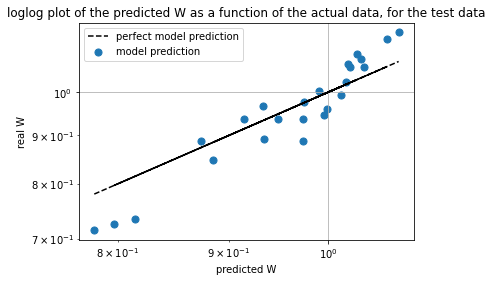

In [ ]:
import matplotlib.pyplot as plt
x=predicted[:,0]
y=yarray[:,0]
plt.plot(x,x,label='perfect model prediction', color='black',linestyle='--')
plt.scatter(x,y,s=50,label='model prediction')
plt.loglog()
plt.xlabel('predicted W')
plt.ylabel('real W')
plt.title('loglog plot of the predicted W as a function of the actual data, for the test data')
plt.legend(loc='upper left')
plt.grid()
plt.show()




In [ ]:
import math as ma
from sklearn.metrics import mean_squared_error

RMSE=ma.sqrt(mean_squared_error(predicted[:,1], yarray[:,1]))
print(RMSE)



0.07285300122114204


In [ ]:
predicted_test=recon_model.predict(xtest)
print (predicted_test)

1/1 [==============================] - 0s 46ms/step
[[0.9141777  1.2889451 ]
 [0.9595901  1.4297241 ]
 [0.97303176 1.4759748 ]
 [0.94539297 1.3725456 ]
 [0.98160106 0.98497057]
 [1.0073587  1.0340781 ]
 [1.0604073  1.192508  ]
 [1.0147793  0.7905351 ]
 [1.0255495  0.848417  ]
 [1.0223434  0.8734874 ]
 [1.0543834  0.9595845 ]
 [1.0694196  0.9891218 ]]


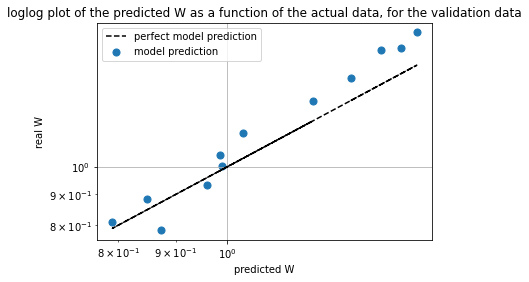

In [ ]:

import matplotlib.pyplot as plt
x=predicted_test[:,1]
y=yarray2[:,1]
plt.plot(x,x,label='perfect model prediction', color='black',linestyle='--')
plt.scatter(x,y,s=50,label='model prediction')
plt.loglog()
plt.xlabel('predicted W')
plt.ylabel('real W')
plt.title('loglog plot of the predicted W as a function of the actual data, for the validation data')
plt.legend(loc='upper left')
plt.grid()
plt.show()



In [ ]:
RMSE=ma.sqrt(mean_squared_error(predicted_test[:,1], yarray2[:,1]))
print(RMSE)

0.10944814399123168


In [ ]:
import math, numpy

#Part 1 input HI FLUX DATA: Air temp (degC), ID (W/sqm), load resistance (ohms)

xdata1 = [[-10.0, 1550, 4.464], 
  [-10.0, 1850, 4.464], 
  [10.0, 1550, 4.464], 
  [10.0, 1850, 4.464], 
  [30.0, 1550, 4.464], 
  [30.0, 1850, 4.464], 
  [-10.0, 1550, 6.696], 
  [-10.0, 1850, 6.696], 
  [10.0, 1550, 6.696], 
  [10.0, 1850, 6.696], 
  [30.0, 1550, 6.696], 
  [30.0, 1850, 6.696], 
  [-10.0, 1550, 8.928], 
  [-10.0, 1850, 8.928],   
  [10.0, 1550, 8.928], 
  [10.0, 1850, 8.928], 
  [30.0, 1550, 8.928], 
  [30.0, 1850, 8.928]]
 
#Part 1 output HI FLUX DATA: load voltage (V) and Power out (W)
ydata1 = [[26.1, 152.8], 
 [26.5, 172.7], 
 [27.9, 191.4], 
 [28.3, 198.0], 
 [29.6, 217.8], 
 [30.1, 224.4],  
 [26.9, 118.8], 
 [27.2, 122.1], 
 [28.8, 136.4], 
 [29.1, 139.7], 
 [30.6, 154.0], 
 [31.0, 158.4],  
 [27.3, 92.4], 
 [27.6, 94.6], 
 [29.2, 105.6], 
 [29.6, 107.8], 
 [31.1, 119.9], 
 [31.5, 123.2]]


Tai=[]
ID=[]
R=[]
V=[]
W=[]

for i in range (len(xdata1)):
    if xdata1[i][1]>1300:
        Tai.append(xdata1[i][0])
        ID.append(xdata1[i][1])
        R.append(xdata1[i][2])
        V.append(ydata1[i][0])
        W.append(ydata1[i][1])
    
Tamed2 = statistics.median(Tai)
IDmed2 = statistics.median(ID)
RLmed2 = statistics.median(R)

VLmed2 = statistics.median(V)
Wdmed2 = statistics.median(W)

xdata4=[]
ydata4=[]
a=0
b=0
c=0
d=0
e=0
f=0

for i in range (len(xdata1)):
    if xdata1[i][1]>1300:
        d=xdata1[i][0]/Tamed2
        e=xdata1[i][1]/IDmed2
        f=xdata[i][2]/RLmed2
        xdata4.append([d,e,f])
        a=ydata1[i][0]/VLmed2
        b=ydata1[i][1]/Wdmed2
        ydata4.append([a,b])


    

xarray4= numpy.array(xdata4)
yarray4= numpy.array(ydata4)
print (xdata4)
print (xarray4)
print (ydata4)
print (yarray4)

[[-1.0, 0.9117647058823529, 0.6666666666666667], [-1.0, 1.088235294117647, 0.6666666666666667], [1.0, 0.9117647058823529, 0.6666666666666667], [1.0, 1.088235294117647, 0.6666666666666667], [3.0, 0.9117647058823529, 0.6666666666666667], [3.0, 1.088235294117647, 0.6666666666666667], [-1.0, 0.9117647058823529, 0.6666666666666667], [-1.0, 1.088235294117647, 0.6666666666666667], [1.0, 0.9117647058823529, 0.6666666666666667], [1.0, 1.088235294117647, 0.6666666666666667], [3.0, 0.9117647058823529, 0.6666666666666667], [3.0, 1.088235294117647, 0.6666666666666667], [-1.0, 0.9117647058823529, 1.0], [-1.0, 1.088235294117647, 1.0], [1.0, 0.9117647058823529, 1.0], [1.0, 1.088235294117647, 1.0], [3.0, 0.9117647058823529, 1.0], [3.0, 1.088235294117647, 1.0]]
[[-1.          0.91176471  0.66666667]
 [-1.          1.08823529  0.66666667]
 [ 1.          0.91176471  0.66666667]
 [ 1.          1.08823529  0.66666667]
 [ 3.          0.91176471  0.66666667]
 [ 3.          1.08823529  0.66666667]
 [-1.       

In [ ]:
predicted_g=recon_model.predict(xdata4)
print (predicted_g)


1/1 [==============================] - 0s 43ms/step
[[0.89158463 1.2383637 ]
 [0.9080379  1.2816635 ]
 [0.93539643 1.3599267 ]
 [0.9537423  1.4135336 ]
 [0.9808085  1.516099  ]
 [1.0152688  1.6530662 ]
 [0.89158463 1.2383637 ]
 [0.9080379  1.2816635 ]
 [0.93539643 1.3599267 ]
 [0.9537423  1.4135336 ]
 [0.9808085  1.516099  ]
 [1.0152688  1.6530662 ]
 [0.9604578  0.91746366]
 [0.9712495  0.94632715]
 [0.99515516 1.0011339 ]
 [1.0028563  1.0245397 ]
 [1.046247   1.1696587 ]
 [1.056005   1.1883003 ]]


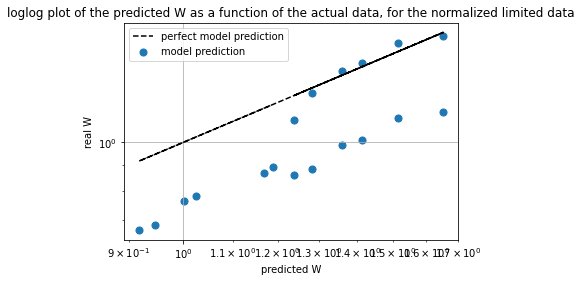

In [ ]:
import matplotlib.pyplot as plt
x=predicted_g[:,1]
y=yarray4[:,1]
plt.plot(x,x,label='perfect model prediction', color='black',linestyle='--')
plt.scatter(x,y,s=50,label='model prediction')
plt.loglog()
plt.xlabel('predicted W')
plt.ylabel('real W')
plt.title('loglog plot of the predicted W as a function of the actual data, for the normalized limited data')
plt.legend(loc='upper left')
plt.grid()
plt.show()


In [ ]:
RMSE=ma.sqrt(mean_squared_error(predicted_g[:,1], yarray4[:,1]))
print(RMSE)

0.28511585410627344


In [ ]:
T=20
Rl=np.linspace(4,8,len(xdata))
Id=np.linspace(500,1800,len(xdata))


T1=[]
ID=[]
RL=[]
xdata5=[]

for i in range (len(Rl)):
    T1.append(T/Tamed)
    ID.append(Id[i]/IDmed)
    RL.append(Rl[i]/RLmed)
    xdata5.append([T1[i],ID[i],RL[i]])
    
print (xdata5)

[[2.0, 0.625, 0.5973715651135006], [2.0, 0.6714285714285714, 0.6144393241167434], [2.0, 0.717857142857143, 0.6315070831199864], [2.0, 0.7642857142857143, 0.6485748421232292], [2.0, 0.8107142857142857, 0.6656426011264721], [2.0, 0.8571428571428572, 0.682710360129715], [2.0, 0.9035714285714286, 0.699778119132958], [2.0, 0.95, 0.7168458781362007], [2.0, 0.9964285714285714, 0.7339136371394437], [2.0, 1.042857142857143, 0.7509813961426864], [2.0, 1.0892857142857144, 0.7680491551459293], [2.0, 1.135714285714286, 0.7851169141491723], [2.0, 1.1821428571428572, 0.8021846731524152], [2.0, 1.2285714285714286, 0.819252432155658], [2.0, 1.275, 0.8363201911589008], [2.0, 1.3214285714285716, 0.8533879501621437], [2.0, 1.3678571428571429, 0.8704557091653866], [2.0, 1.4142857142857144, 0.8875234681686295], [2.0, 1.4607142857142859, 0.9045912271718723], [2.0, 1.5071428571428571, 0.9216589861751151], [2.0, 1.5535714285714286, 0.9387267451783581], [2.0, 1.6, 0.9557945041816011], [2.0, 1.6464285714285716, 

In [ ]:
predicted_h= np.zeros((len(RL),len(RL)))

for k in range (len(xdata5)):
    for j in range (len(xdata5)):
        test = [[ 2.0 , ID[k], RL[j] ]]
        testarray = np.array(test)
        outpt = model.predict(testarray)
        predicted_h[k][j]=outpt[0][0]*Wdmed

1/1 [==============================] - 0s 21ms/step


In [ ]:
ID2=[]
RL2=[]

for i in range (len(ID)):
    ID2.append(ID[i]*IDmed)
    RL2.append(RL[i]*RLmed)

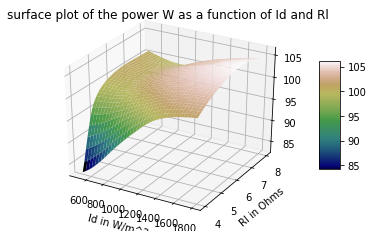

In [ ]:
from mpl_toolkits import mplot3d
import numpy 
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate


X=np.array(ID2)
Y=np.array(RL2)
X,Y=numpy.meshgrid(X,Y)
Z=np.array(predicted_h)

mycmap = plt.get_cmap('gist_earth')

fig = plt.figure()
ax = plt.axes(projection ='3d')
surf = ax.plot_surface(X,Y,Z,cmap=mycmap)


fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('surface plot of the power W as a function of Id and Rl')
plt.xlabel('Id in W/m^2')
plt.ylabel('Rl in Ohms')
plt.show()